In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings(action='ignore')

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')


*K-means clustering is a valuable tool for segmenting mall customers into distinct groups based on their purchasing behaviors and characteristics. By leveraging this method, malls can gain deep insights into their customer base, identifying different customer segments that exhibit similar spending patterns. For instance, K-means can help categorize customers into groups like "bargain shoppers," "luxury buyers," or "window shoppers" by analyzing variables such as purchase frequency, the amount spent, and preferred shopping times. This segmentation provides malls with the advantage of tailoring marketing strategies, store layouts, and product offerings to meet the specific needs and preferences of each customer segment, ultimately improving customer satisfaction and boosting sales.*

In [3]:
file_path = ('/content/drive/My Drive/Prodigy_mall_customers_task.csv')
data = pd.read_csv(file_path)
print("shape of dataset is: ", data.shape)
pd.set_option('display.max_columns', None)
data.head()

shape of dataset is:  (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


*The data provides insights into gender-based spending patterns, the impact of age on spending behavior, the relationship between annual income and spending score, opportunities for customer segmentation using clustering techniques, and correlations and trends that can inform data-driven decisions.*

In [4]:
print("Missing values : ", data.isnull().sum().sum())
print("Duplicate values: ", data.duplicated().sum())

Missing values :  0
Duplicate values:  0


The "Customer ID" column serves no significant purpose, hence Dropping it.

In [5]:
data = data.drop(columns=["CustomerID"], axis=1)

# Exploratory Data Analysis

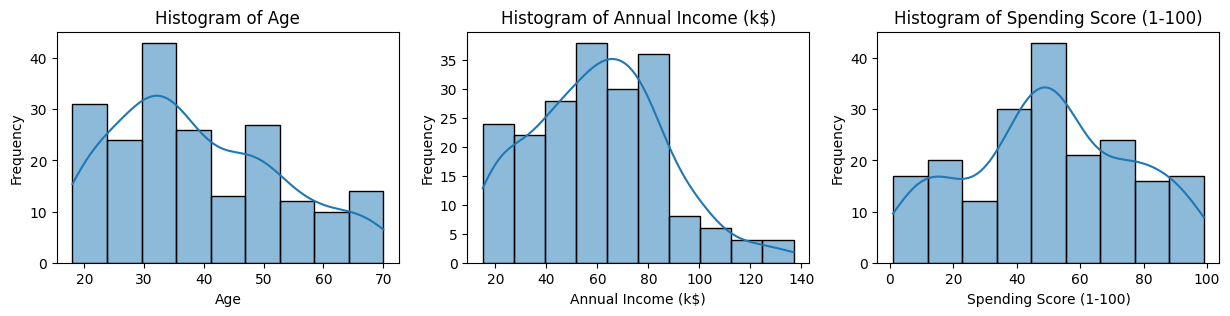

In [6]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

plt.figure(figsize=(15, 3))

for i, col in enumerate(columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=data, x=col, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.show()


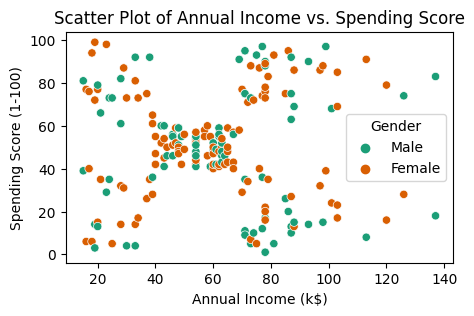

In [7]:
plt.figure(figsize=(5, 3))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', palette='Dark2')
plt.title('Scatter Plot of Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

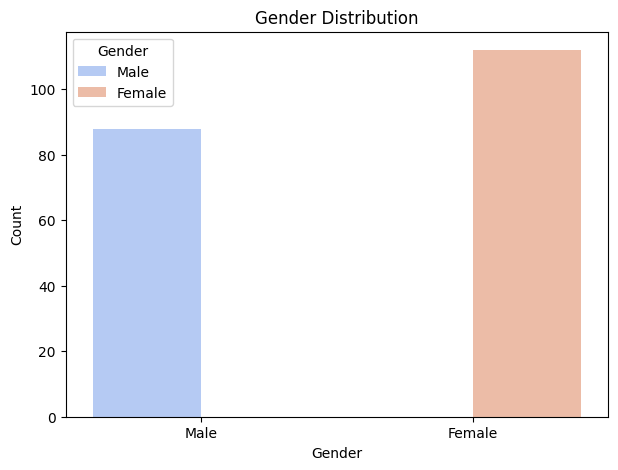

In [8]:
plt.figure(figsize=(7,5))
sns.countplot(data=data, x='Gender', palette='coolwarm', hue = 'Gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


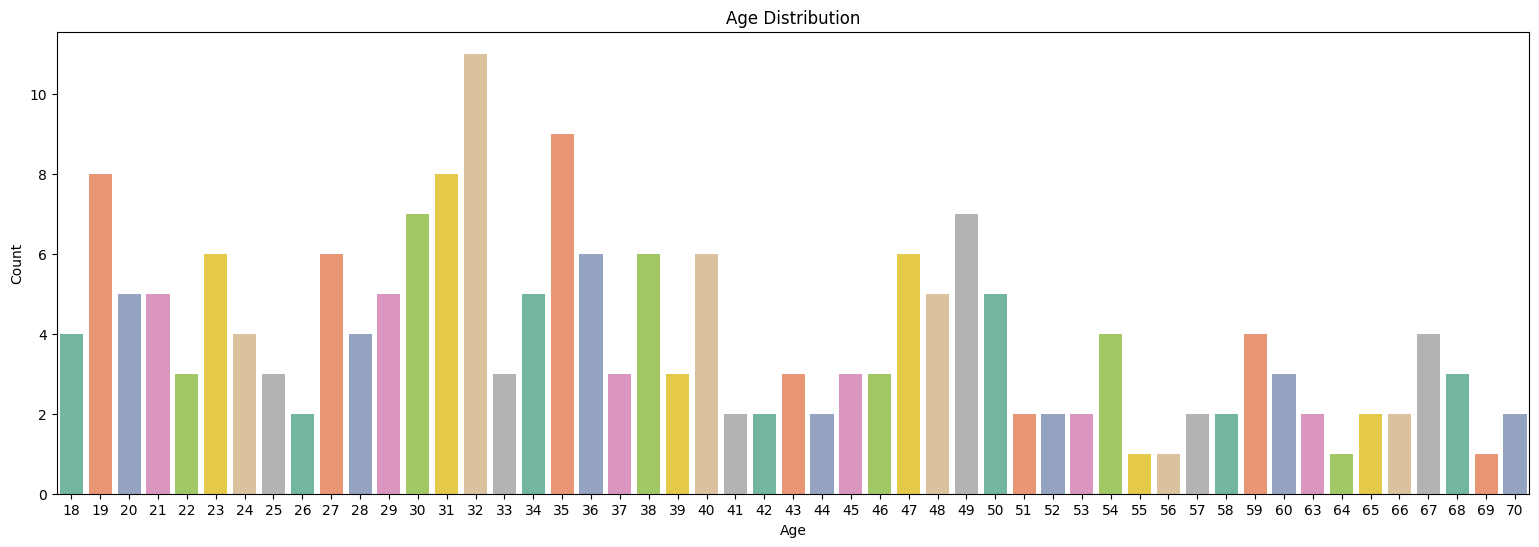

In [9]:
plt.figure(figsize=(19, 6))
sns.countplot(data=data, x='Age', palette='Set2')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [10]:
data_copy = data.copy()

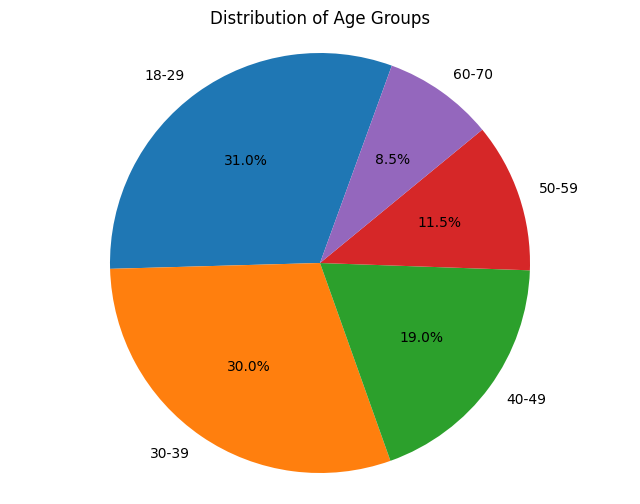

In [11]:
age_bins = [18, 30, 40, 50, 60, 70]

age_labels = ['18-29', '30-39', '40-49', '50-59', '60-70']

data_copy['Age Group'] = pd.cut(data_copy['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

age_group_counts = data_copy['Age Group'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=70)
plt.title('Distribution of Age Groups')
plt.axis('equal')

plt.show()

In [12]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# Label Encoding

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Gender"] = le.fit_transform(data['Gender'])
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


# Correlation Visualization

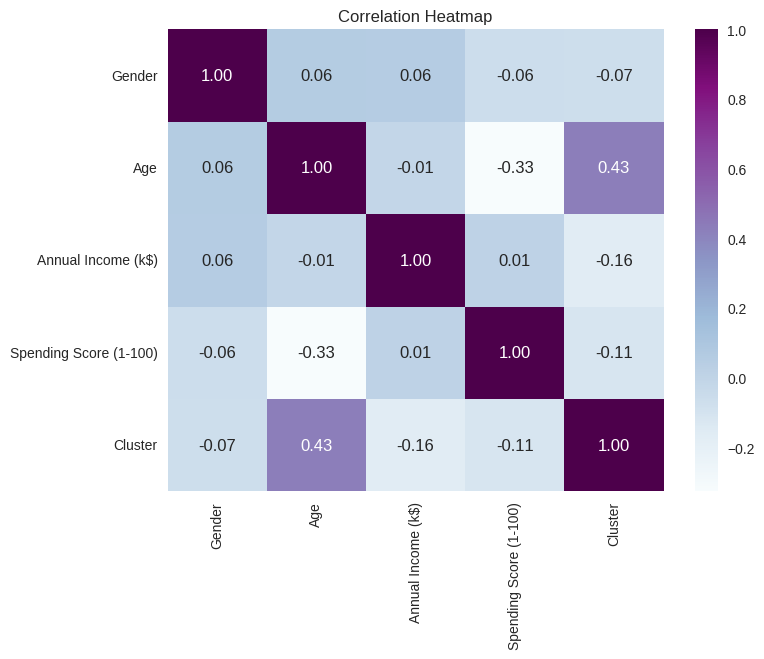

In [26]:
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [15]:
X = data.copy()

- Silhouette Score:
- - The Silhouette Score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). It ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. A score close to 1 suggests that the object is appropriately placed within its cluster.

- Davies-Bouldin Index:
- - The Davies-Bouldin Index measures the average similarity between each cluster and its most similar cluster. It is a lower-bound on the ratio of the sum of the within-cluster scatter and the between-cluster separation. A lower value indicates better clustering. In practice, lower Davies-Bouldin Index values represent more compact and well-separated clusters.

- Calinski-Harabasz Index:
- - The Calinski-Harabasz Index, also known as the Variance Ratio Criterion, is used to evaluate the goodness of clustering. It measures the ratio of between-cluster variance to within-cluster variance. Higher values of this index indicate better-defined, more separated clusters. It is often used to find the optimal number of clusters, where a higher index implies a better clustering solution.

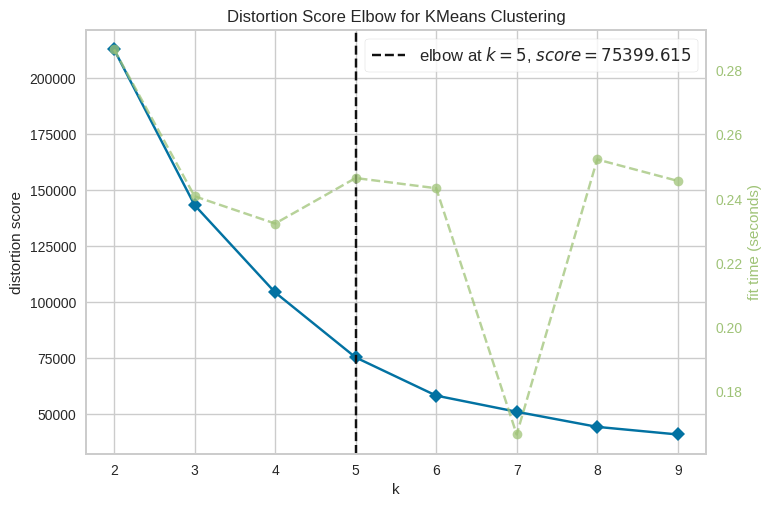

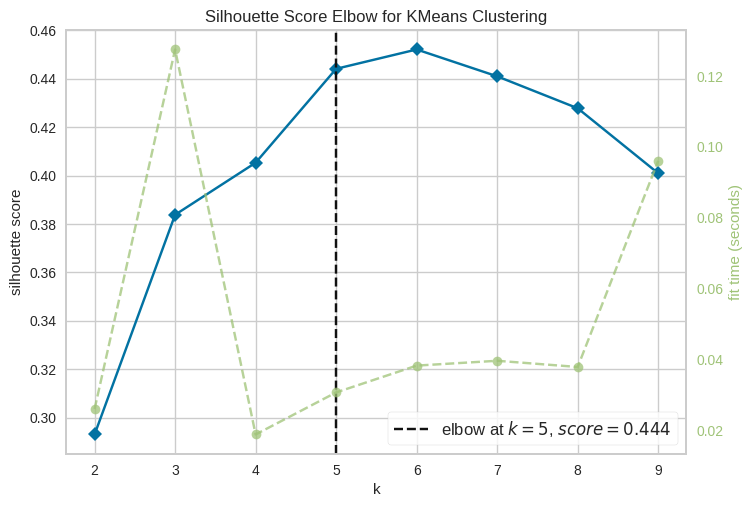

In [16]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

def visualize_kmeans_elbow_silhouette(X, metric, min_clusters=2, max_clusters=10):
    KM_model = KMeans(random_state=0, n_init=10)
    visualizer = KElbowVisualizer(KM_model, k=(min_clusters, max_clusters), metric=metric)
    visualizer.fit(X)
    visualizer.show()

# Visualizing the elbow method
visualize_kmeans_elbow_silhouette(X, metric="distortion")

# Visualizing the silhouette method
visualize_kmeans_elbow_silhouette(X, metric="silhouette")

plt.show()

# K means Clustering

**Number of Clusters : 4**

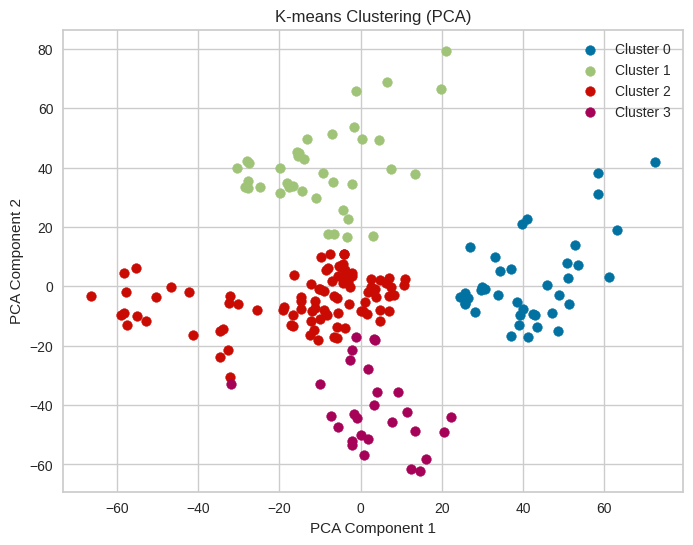

In [17]:
from sklearn.decomposition import PCA
num_clusters_4 = 4

kmeans_4 = KMeans(n_clusters=num_clusters_4, init = 'k-means++')
kmeans_4.fit(X)

data['Cluster'] = kmeans_4.labels_

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
for cluster in range(num_clusters_4):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(X_pca[cluster_data.index, 0], X_pca[cluster_data.index, 1], label=f'Cluster {cluster}')

plt.title('K-means Clustering (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


Silhouette Score: 0.40557857741155656
Davies-Bouldin Index: 0.8915245647492495
Calinski-Harabasz Index: 128.03950575428365


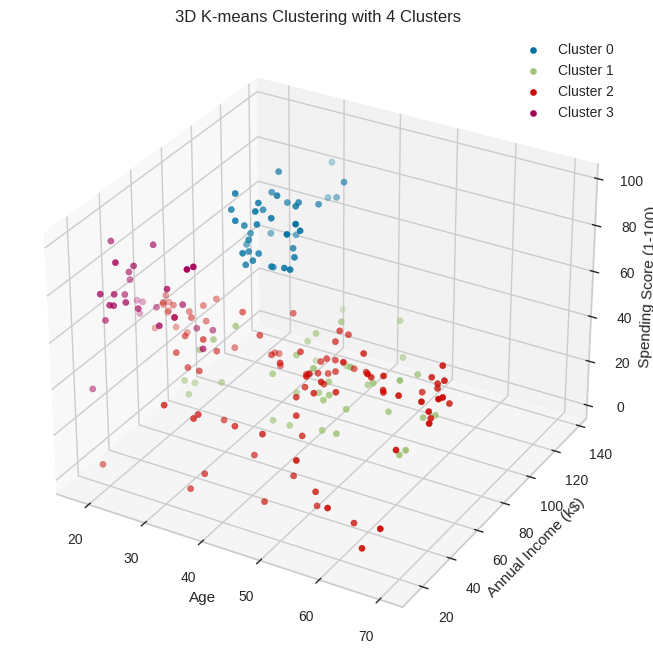

In [18]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_labels = kmeans_4.labels_
silhouette_4 = silhouette_score(data, cluster_labels)
davies_bouldin_4 = davies_bouldin_score(data, cluster_labels)
calinski_harabasz_4 = calinski_harabasz_score(data, cluster_labels)

print(f"Silhouette Score: {silhouette_4}")
print(f"Davies-Bouldin Index: {davies_bouldin_4}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_4}")

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(num_clusters_4):
    cluster_data = data[data['Cluster'] == cluster]
    ax.scatter(cluster_data['Age'], cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
               label=f'Cluster {cluster}')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title('3D K-means Clustering with 4 Clusters')
plt.legend()
plt.show()


**Number of Clusters : 5**

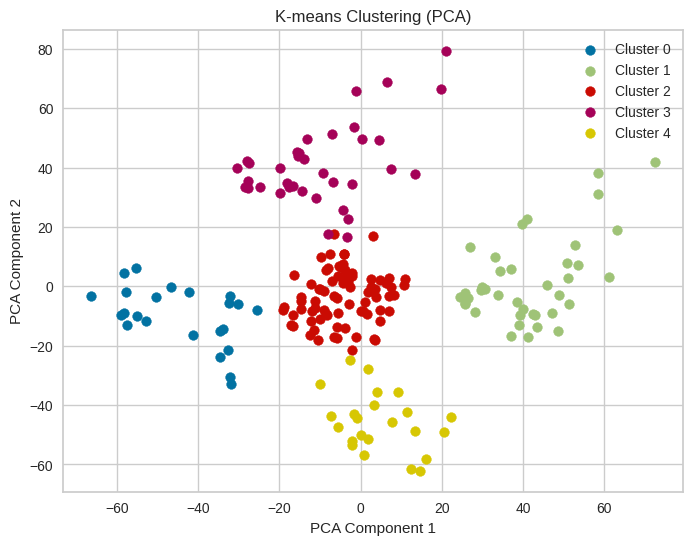

In [19]:
num_clusters_5 = 5

kmeans_5 = KMeans(n_clusters=num_clusters_5, init = 'k-means++')
kmeans_5.fit(X)

data['Cluster'] = kmeans_5.labels_

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
for cluster in range(num_clusters_5):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(X_pca[cluster_data.index, 0], X_pca[cluster_data.index, 1], label=f'Cluster {cluster}')

plt.title('K-means Clustering (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


Silhouette Score: 0.4445512214568559
Davies-Bouldin Index: 0.8216097348622551
Calinski-Harabasz Index: 151.11374464250838


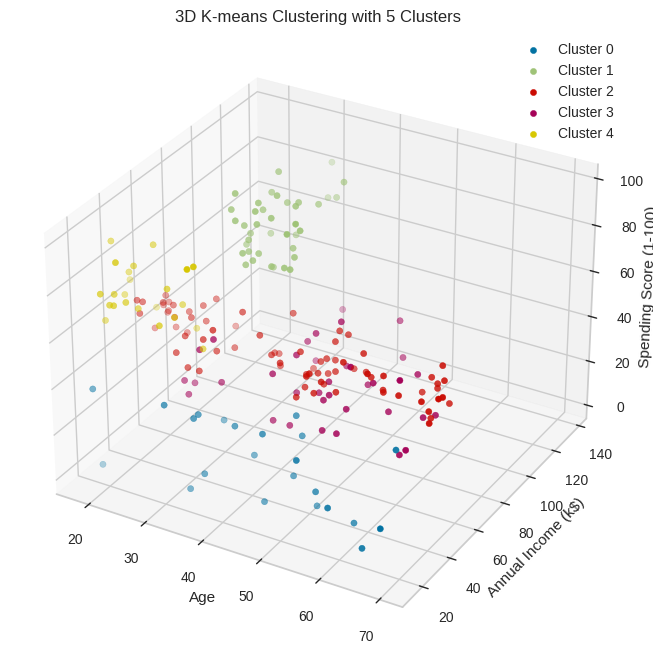

In [20]:
cluster_labels = kmeans_5.labels_
silhouette_5 = silhouette_score(data, cluster_labels)
davies_bouldin_5 = davies_bouldin_score(data, cluster_labels)
calinski_harabasz_5 = calinski_harabasz_score(data, cluster_labels)

print(f"Silhouette Score: {silhouette_5}")
print(f"Davies-Bouldin Index: {davies_bouldin_5}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_5}")

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(num_clusters_5):
    cluster_data = data[data['Cluster'] == cluster]
    ax.scatter(cluster_data['Age'], cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
               label=f'Cluster {cluster}')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title('3D K-means Clustering with 5 Clusters')
plt.legend()
plt.show()


**Number of Clusters : 6**

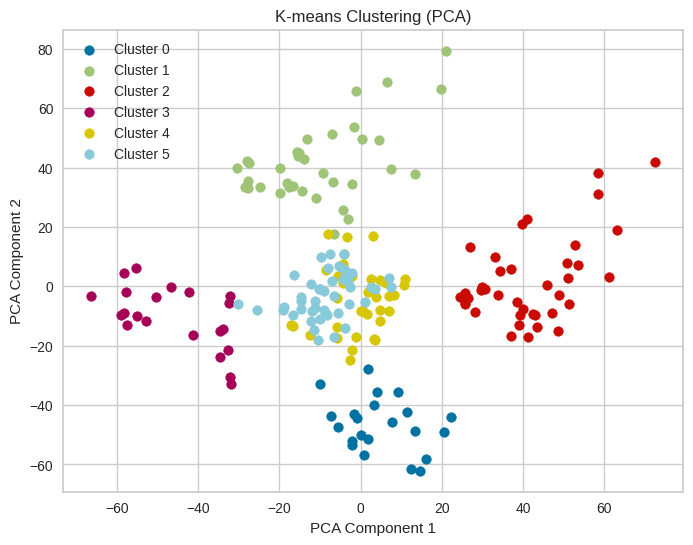

In [21]:
num_clusters_6 = 6

kmeans_6 = KMeans(n_clusters=num_clusters_6, init = 'k-means++')
kmeans_6.fit(X)

data['Cluster'] = kmeans_6.labels_

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
for cluster in range(num_clusters_6):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(X_pca[cluster_data.index, 0], X_pca[cluster_data.index, 1], label=f'Cluster {cluster}')

plt.title('K-means Clustering (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


Silhouette Score: 0.4531946192222351
Davies-Bouldin Index: 0.7464445219684942
Calinski-Harabasz Index: 166.97180721724104


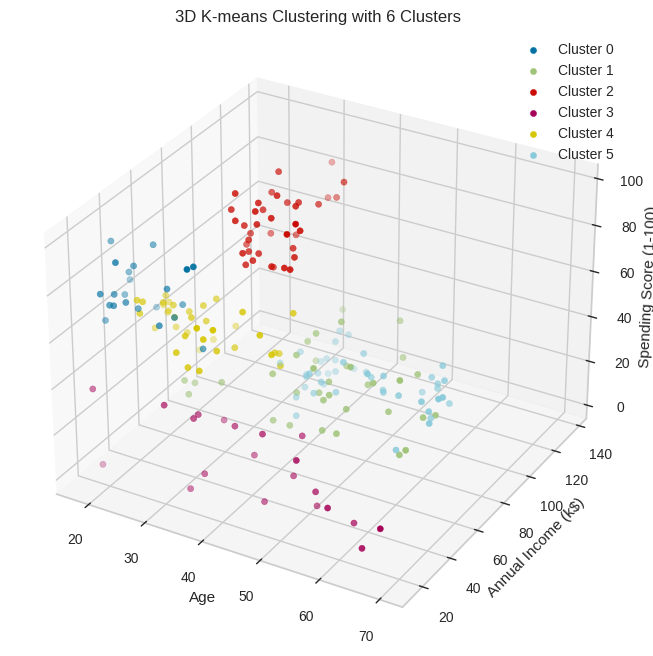

In [22]:
cluster_labels = kmeans_6.labels_
silhouette_6 = silhouette_score(data, cluster_labels)
davies_bouldin_6 = davies_bouldin_score(data, cluster_labels)
calinski_harabasz_6 = calinski_harabasz_score(data, cluster_labels)

print(f"Silhouette Score: {silhouette_6}")
print(f"Davies-Bouldin Index: {davies_bouldin_6}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_6}")

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(num_clusters_6):
    cluster_data = data[data['Cluster'] == cluster]
    ax.scatter(cluster_data['Age'], cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
               label=f'Cluster {cluster}')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title('3D K-means Clustering with 6 Clusters')
plt.legend()
plt.show()


In [23]:
print(f"Silhouette Score: {silhouette_4}")
print(f"Davies-Bouldin Index: {davies_bouldin_4}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_4}")
print("------------------------------------------")
print(f"Silhouette Score: {silhouette_5}")
print(f"Davies-Bouldin Index: {davies_bouldin_5}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_5}")
print("------------------------------------------")
print(f"Silhouette Score: {silhouette_6}")
print(f"Davies-Bouldin Index: {davies_bouldin_6}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_6}")


Silhouette Score: 0.40557857741155656
Davies-Bouldin Index: 0.8915245647492495
Calinski-Harabasz Index: 128.03950575428365
------------------------------------------
Silhouette Score: 0.4445512214568559
Davies-Bouldin Index: 0.8216097348622551
Calinski-Harabasz Index: 151.11374464250838
------------------------------------------
Silhouette Score: 0.4531946192222351
Davies-Bouldin Index: 0.7464445219684942
Calinski-Harabasz Index: 166.97180721724104


**Based on the three evaluation metrics, the third clustering result with 6 clusters appears to be the best in our case.**

# Storing the K-means model to be utilized in subsequent segmentation tasks.

In [24]:
import joblib
model_filename = 'kmeans_6_model.pkl'
joblib.dump(kmeans_6, model_filename)

print("K-means model saved to", model_filename)

K-means model saved to kmeans_6_model.pkl
